In [1]:
import distutils
import distutils.util
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import os
import os.path as opath
import ast
import json
from pandas.io.json import json_normalize
import datetime
import pickle
from datetime import datetime
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', -1)
color_success='#00ff66'#kickstarter green#'#2BDE73'
color_fail='#FF0000' # red
graph_color_palette=[
    color_success, #kickstarter green#'#2BDE73'
    '#55ee99',# kickstarete light green
    'brown',
    'grey'
    ,color_fail # red
]

In [3]:
# from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
df_all_months = pickle.load( open( "all_months_2017.sa", "rb" ) )

In [5]:
df_all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220203 entries, 0 to 220204
Data columns (total 33 columns):
Catgegory_val            220203 non-null object
Project_url              220203 non-null object
backers_count            220203 non-null int64
category                 220203 non-null object
country                  220203 non-null object
created_at               220203 non-null int64
created_at_val           220203 non-null object
creator                  220203 non-null object
currency                 220203 non-null object
deadline                 220203 non-null int64
deadline_val             220203 non-null object
disable_communication    220203 non-null bool
goal                     220203 non-null float64
id                       220203 non-null int64
is_registered            47171 non-null object
launched_at              220203 non-null int64
launched_at_val          220203 non-null object
location                 219405 non-null object
location_cityname        219405 

In [6]:
df_all_months.head()

,Catgegory_val,Project_url,backers_count,category,country,created_at,created_at_val,creator,currency,deadline,...,slug,spotlight,staff_pick,state,state_changed_at,state_changed_at_val,urls,usd_pledged,userid,username
0,Digital Art,https://www.kickstarter.com/projects/ithaqualabs/100-fantasy-portraits-for-oria-trail-the-game?ref=category_newest,28,"{""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/art/digital%20art""}},""color"":16760235,""parent_id"":1,""name"":""Digital Art"",""id"":21,""position"":3,""slug"":""art/digital art""}",US,1483170863,2016-12-31 00:54:23,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/ithaqualabs""},""api"":{""user"":""https://api.kickstarter.com/v1/users/246410818?signature=1502949105.be71a5c8169617f9faeec39b384b715b0dcbbdcd""}},""is_registered"":true,""name"":""Christopher \""Michael\"" Hall"",""id"":246410818,""avatar"":{""small"":""https://ksr-ugc.imgix.net/assets/007/018/494/e96cc66ca639dfc9055df48505952104_original.jpg?w=160&h=160&fit=crop&v=1461428617&auto=format&q=92&s=947233770a463f383a6e02ce9de927ab"",""thumb"":""https://ksr-ugc.imgix.net/assets/007/018/494/e96cc66ca639dfc9055df48505952104_original.jpg?w=40&h=40&fit=crop&v=1461428617&auto=format&q=92&s=2235a24568ec8aadb35373184933a347"",""medium"":""https://ksr-ugc.imgix.net/assets/007/018/494/e96cc66ca639dfc9055df48505952104_original.jpg?w=160&h=160&fit=crop&v=1461428617&auto=format&q=92&s=947233770a463f383a6e02ce9de927ab""},""slug"":""ithaqualabs""}",USD,1486194840,...,100-fantasy-portraits-for-oria-trail-the-game,True,False,successful,1486194840,2017-02-04 00:54:00,"{""web"":{""project"":""https://www.kickstarter.com/projects/ithaqualabs/100-fantasy-portraits-for-oria-trail-the-game?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/ithaqualabs/100-fantasy-portraits-for-oria-trail-the-game/rewards""}}",478.000000,246410818,"Christopher ""Michael"" Hall"
1,Digital Art,https://www.kickstarter.com/projects/1655679628/the-deer-hunter?ref=category_newest,16,"{""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/art/digital%20art""}},""color"":16760235,""parent_id"":1,""name"":""Digital Art"",""id"":21,""position"":3,""slug"":""art/digital art""}",GB,1483733879,2017-01-06 13:17:59,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/1655679628""},""api"":{""user"":""https://api.kickstarter.com/v1/users/1655679628?signature=1502949105.24e219e1c2eca7a3ee9e86a0a925ae429feea0be""}},""is_registered"":true,""name"":""Bryn G Jones"",""id"":1655679628,""avatar"":{""small"":""https://ksr-ugc.imgix.net/assets/009/460/015/c03572d2faa92221ad0916f491403d5a_original.jpg?w=160&h=160&fit=crop&v=1495185107&auto=format&q=92&s=2f41ee35e1ade1c4e50b8f144e6f96db"",""thumb"":""https://ksr-ugc.imgix.net/assets/009/460/015/c03572d2faa92221ad0916f491403d5a_original.jpg?w=40&h=40&fit=crop&v=1495185107&auto=format&q=92&s=d81fca8dc5767c55dfd38affe2749855"",""medium"":""https://ksr-ugc.imgix.net/assets/009/460/015/c03572d2faa92221ad0916f491403d5a_original.jpg?w=160&h=160&fit=crop&v=1495185107&auto=format&q=92&s=2f41ee35e1ade1c4e50b8f144e6f96db""}}",GBP,1485990000,...,the-deer-hunter,True,True,successful,1485990001,2017-02-01 16:00:01,"{""web"":{""project"":""https://www.kickstarter.com/projects/1655679628/the-deer-hunter?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/1655679628/the-deer-hunter/rewards""}}",358.113835,1655679628,Bryn G Jones
2,Digital Art,https://www.kickstarter.com/projects/346706187/bespoke-pet-portraits-michael-gardner-design?ref=category_newest,7,"{""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/art/digital%20art""}},""color"":16760235,""parent_id"":1,""name"":""Digital Art"",""id"":21,""position"":3,""slug"":""art/digital art""}",GB,1482876950,2016-12-27 15:15:50,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/346706187""},""api"":{""user"":""https://api.kick

In [7]:
df_final_months=df_all_months[['id',
'Catgegory_val',
'backers_count',
'country',
'location_type',
'created_at_val',
'deadline_val',  
'goal',
'launched_at_val', 
'name',
'pledged',
'spotlight', 
'staff_pick',
'state',
'state_changed_at_val',  
'usd_pledged',
'userid'
]]
df_final_months.set_index('id')
df_final_months.rename(columns={'id': 'project_id', 'Catgegory_val': 'category',
                                'created_at_val':'created_at','launched_at_val':'launched_at',
                                'state_changed_at_val':'state_changed_at','deadline_val':'deadline'}, inplace=True)
#df_final_months['launched_at'] =pd.to_datetime(df_final_months['launched_at'] )
#df_final_months['created_at'] =pd.to_datetime(df_final_months['created_at'] )
#df_final_months['state_changed_at'] =pd.to_datetime(df_final_months['state_changed_at'] )
#df_final_months['deadline'] =pd.to_datetime(df_final_months['deadline'] )
#df_final_months

,Catgegory_val,backers_count,country,location_type,created_at_val,deadline_val,goal,launched_at_val,name,pledged,spotlight,staff_pick,state,state_changed_at_val,usd_pledged,userid
id,,,,,,,,,,,,,,,,
946464764,Digital Art,28,US,Town,2016-12-31 00:54:23,2017-02-04 00:54:00,100.0,2017-01-06 13:59:56,100 Fantasy Portraits for Oria Trail the Game,478.00,True,False,successful,2017-02-04 00:54:00,478.000000,246410818
432961380,Digital Art,16,GB,Town,2017-01-06 13:17:59,2017-02-01 16:00:00,25.0,2017-01-15 04:22:41,The Deer Hunter,294.00,True,True,successful,2017-02-01 16:00:01,358.113835,1655679628
886034377,Digital Art,7,GB,Town,2016-12-27 15:15:50,2017-02-14 12:50:59,500.0,2017-01-15 12:50:59,Bespoke Pet Portraits – Michael Gardner Design,501.00,True,False,successful,2017-02-14 12:50:59,610.255209,346706187
1700257262,Digital Art,29,US,Town,2016-02-11 10:50:05,2017-02-17 14:33:39,200.0,2017-01-18 14:33:39,Ancient Ones: Knight of Jupiter,893.00,True,False,successful,2017-02-17 14:33:41,893.000000,528516383
1291954177,Digital Art,42,US,Town,2016-07-31 16:36:59,2017-02-25 09:38:44,1500.0,2017-01-26 09:38:44,"""Starry Skies"" Animated Short Film",1847.00,True,False,successful,2017-02-25 09:38:44,1847.000000,897527126
773132137,Digital Art,8,US,Town,2017-01-27 20:07:51,2017-02-27 16:00:00,100.0,2017-01-28 08:36:13,"Make/100 Painted Art Prints: Robot Mermaid, Dark Queen",355.00,True,False,successful,2017-02-27 16:00:00,355.000000,993104701
1034315928,Digital Art,10,US,Town,2016-11-22 15:49:47,2017-03-01 15:03:38,400.0,2017-01-30 15:03:38,Spirit Dragon Limited Edition Art Print,576.00,True,False,successful,2017-03-01 15:03:38,576.000000,573807264
140043775,Digital Art,64,SE,Town,2017-01-20 06:00:22,2017-03-04 10:26:46,10000.0,2017-02-02 10:26:46,Pictogram music posters,28110.00,True,False,successful,2017-03-04 10:26:48,3211.019917,1662771849
1822914340,Digital Art,3,HK,Town,2017-02-11 03:26:20,2017-03-16 10:10:37,3000.0,2017-02-14 11:10:37,Transform 10 City Photos into Watercolor Artworks,3001.00,True,False,successful,2017-03-16 10:10:37,386.754055,1008359743


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [8]:
#get the exchange rate column and get the usd_goal column
# converting all currency on same base currency
exchange_rate_ser= df_final_months.usd_pledged/df_final_months.pledged
df_final_months = df_final_months.assign( exchange_rate=pd.to_numeric( exchange_rate_ser.fillna('1')))
#df_final_months= df_final_months.assign(usd_goal= goal*exchange_rate_ser.fillna('1'))
df_final_months=df_final_months.assign(usd_goal= lambda row : row.goal * (row.exchange_rate))


####check all the below when new month added

In [9]:
# check all the below when new month added
#check project without goal, amount. check if new month added
#df_final_months[(df_final_months.goal<=0 )]
#df_final_months[(df_final_months.pledged<=0 )& (df_final_months.backers_count<=0 )]

# check distinctt state
#df_final_months.state.unique()

# check suspened and exclude
#df_final_months[df_final_months.state=='suspended']

# check canceled and exclude
#df_final_months[df_final_months.state=='canceled']

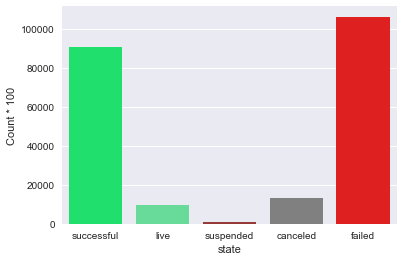

In [10]:
#check distinct state and count# added pledge condtion and got some major differebcein count
#state_count=df_final_months.groupby(df_final_months.state).size()
#(state_count//100).plot(kind='bar',y='true',legend='true')
#state_count
sb.countplot(df_final_months.state,palette=graph_color_palette)
plt.ylabel('Count * 100')

In [11]:
# filter out suspened, cancleed and live projects
final_stat_df= df_final_months[(df_final_months.state=='successful')|(df_final_months.state=='failed')]
#final_stat_df
final_stat_df.set_index('project_id')
#final_stat_df.head()

,category,backers_count,country,location_type,created_at,deadline,goal,launched_at,name,pledged,spotlight,staff_pick,state,state_changed_at,usd_pledged,userid,exchange_rate,usd_goal
project_id,,,,,,,,,,,,,,,,,,
946464764,Digital Art,28,US,Town,2016-12-31 00:54:23,2017-02-04 00:54:00,100.0,2017-01-06 13:59:56,100 Fantasy Portraits for Oria Trail the Game,478.00,True,False,successful,2017-02-04 00:54:00,478.000000,246410818,1.000000,100.000000
432961380,Digital Art,16,GB,Town,2017-01-06 13:17:59,2017-02-01 16:00:00,25.0,2017-01-15 04:22:41,The Deer Hunter,294.00,True,True,successful,2017-02-01 16:00:01,358.113835,1655679628,1.218074,30.451857
886034377,Digital Art,7,GB,Town,2016-12-27 15:15:50,2017-02-14 12:50:59,500.0,2017-01-15 12:50:59,Bespoke Pet Portraits – Michael Gardner Design,501.00,True,False,successful,2017-02-14 12:50:59,610.255209,346706187,1.218074,609.037135
1700257262,Digital Art,29,US,Town,2016-02-11 10:50:05,2017-02-17 14:33:39,200.0,2017-01-18 14:33:39,Ancient Ones: Knight of Jupiter,893.00,True,False,successful,2017-02-17 14:33:41,893.000000,528516383,1.000000,200.000000
1291954177,Digital Art,42,US,Town,2016-07-31 16:36:59,2017-02-25 09:38:44,1500.0,2017-01-26 09:38:44,"""Starry Skies"" Animated Short Film",1847.00,True,False,successful,2017-02-25 09:38:44,1847.000000,897527126,1.000000,1500.000000
773132137,Digital Art,8,US,Town,2017-01-27 20:07:51,2017-02-27 16:00:00,100.0,2017-01-28 08:36:13,"Make/100 Painted Art Prints: Robot Mermaid, Dark Queen",355.00,True,False,successful,2017-02-27 16:00:00,355.000000,993104701,1.000000,100.000000
1034315928,Digital Art,10,US,Town,2016-11-22 15:49:47,2017-03-01 15:03:38,400.0,2017-01-30 15:03:38,Spirit Dragon Limited Edition Art Print,576.00,True,False,successful,2017-03-01 15:03:38,576.000000,573807264,1.000000,400.000000
140043775,Digital Art,64,SE,Town,2017-01-20 06:00:22,2017-03-04 10:26:46,10000.0,2017-02-02 10:26:46,Pictogram music posters,28110.00,True,False,successful,2017-03-04 10:26:48,3211.019917,1662771849,0.114231,1142.305200
1822914340,Digital Art,3,HK,Town,2017-02-11 03:26:20,2017-03-16 10:10:37,3000.0,2017-02-14 11:10:37,Transform 10 City Photos into Watercolor Artworks,3001.00,True,False,successful,2017-03-16 10:10:37,386.754055,1008359743,0.128875,386.625180


In [12]:
final_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196547 entries, 0 to 220202
Data columns (total 19 columns):
project_id          196547 non-null int64
category            196547 non-null object
backers_count       196547 non-null int64
country             196547 non-null object
location_type       195790 non-null object
created_at          196547 non-null object
deadline            196547 non-null object
goal                196547 non-null float64
launched_at         196547 non-null object
name                196546 non-null object
pledged             196547 non-null float64
spotlight           196547 non-null bool
staff_pick          196547 non-null bool
state               196547 non-null object
state_changed_at    196547 non-null object
usd_pledged         196547 non-null float64
userid              196547 non-null int32
exchange_rate       196547 non-null float64
usd_goal            196547 non-null float64
dtypes: bool(2), float64(5), int32(1), int64(2), object(9)
memory usage: 2

""" 
filter out projects
1. successful/failed
2. diff country
3. significant amount (10,000 and above)
4. Should have some pledge amount beacuse people creats dummy projects
5  Should have run for siginifant time ( find out time frame which is appropriate)
6. From different country
7. From different category
8.merger july,june,may. take distinct project. Task to keep it unique **
9.Merge months of project : only changed state, track them. I think will be in not more then 2 or 3 months 
9.
"""

In [13]:
def calculate_ratio(numerator, denominator):
    ratio=0
    if(denominator>0).any():
        ratio=numerator/denominator
    return np.round(ratio,3)

In [14]:
#final_stat_df=df_final_months[df_final_months.usd_pledged>0].loc[:,['project_id','usd_pledged','usd_goal','backers_count','state']]#.groupby(df_all_months.state).sum()
# removed pledge 0 conditon
#final_stat_df=df_work_project.loc[:,['project_id','usd_pledged','usd_goal','backers_count','state']]#.groupby(df_all_months.state).sum()
#final_stat_df=df_work_project
#final_stat_df[final_stat_df.usd_goal.isnull()]

final_stat_df=final_stat_df.assign(
    pledge_count_ratio=lambda row: calculate_ratio(row.usd_pledged,row.backers_count)
)
final_stat_df=final_stat_df.assign(
    pledge_goal_ratio=lambda row: calculate_ratio(row.usd_pledged,row.usd_goal))

final_stat_df=final_stat_df.assign(
    pledge_extra_goal_ratio=lambda row: calculate_ratio((row.usd_pledged-row.usd_goal),row.usd_pledged))
#((final_stat_df.groupby(final_stat_df.category).sum()))#.pledge_by_count)//1000)#.plot(kind='bar')#.groupby(df_all_months.state).sum()
#final_stat_df

final_stat_df['pledge_count_ratio'].fillna(0,inplace=True)
final_stat_df['pledge_goal_ratio'].fillna(0,inplace=True)
final_stat_df['pledge_extra_goal_ratio'].fillna(0,inplace=True)

In [15]:
def get_days_difference(date_from, date_to):
    print(date_from-date_to)#.days

In [16]:
def compare_dates(from_date, to_date):
    date_format = '%Y-%m-%d %H:%M:%S'#'%Y/%m/%d'
    from_date_val = datetime.strptime(from_date, date_format)  
    to_date_val= datetime.strptime(to_date, date_format)  
    #today = datetime.today()
    diff = from_date_val - to_date_val
    return diff.days

In [17]:
def diff_deadline_dates(row):
    return compare_dates(row.deadline,row.launched_at)

In [18]:
def diff_state_changed_dates(row):
    return compare_dates(row.state_changed_at,row.launched_at)

In [19]:
# get the columns for time
#final_stat_df=final_stat_df.assign(deadline_days=lambda row : row.deadline-row.launched_at)
#final_stat_df=final_stat_df.assign(state_change_days=lambda row : row.state_changed_at-row.launched_at)

final_stat_df['deadline_days']=final_stat_df.apply(diff_deadline_dates,axis=1)
final_stat_df['state_change_days']=final_stat_df.apply(diff_state_changed_dates,axis=1)


In [20]:
# use if precise hours is needed , currently not needed
#final_stat_df=final_stat_df.assign(deadline_days_hrs=lambda row : pd.to_datetime(row.deadline)-pd.to_datetime(row.launched_at))
#final_stat_df=final_stat_df.assign(state_change_days_hrs=lambda row : pd.to_datetime(row.state_changed_at)-pd.to_datetime(row.launched_at))

In [102]:
_=final_stat_df.staff_pick.astype('category')

In [22]:
#final_stat_df.head(5)
final_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196547 entries, 0 to 220202
Data columns (total 24 columns):
project_id                 196547 non-null int64
category                   196547 non-null object
backers_count              196547 non-null int64
country                    196547 non-null object
location_type              195790 non-null object
created_at                 196547 non-null object
deadline                   196547 non-null object
goal                       196547 non-null float64
launched_at                196547 non-null object
name                       196546 non-null object
pledged                    196547 non-null float64
spotlight                  196547 non-null bool
staff_pick                 196547 non-null bool
state                      196547 non-null object
state_changed_at           196547 non-null object
usd_pledged                196547 non-null float64
userid                     196547 non-null int32
exchange_rate              196547 non-null 

In [23]:
final_stat_df.head()

,project_id,category,backers_count,country,location_type,created_at,deadline,goal,launched_at,name,...,state_changed_at,usd_pledged,userid,exchange_rate,usd_goal,pledge_count_ratio,pledge_goal_ratio,pledge_extra_goal_ratio,deadline_days,state_change_days
0,946464764,Digital Art,28,US,Town,2016-12-31 00:54:23,2017-02-04 00:54:00,100.0,2017-01-06 13:59:56,100 Fantasy Portraits for Oria Trail the Game,...,2017-02-04 00:54:00,478.000000,246410818,1.000000,100.000000,17.071,4.780,0.791,28,28
1,432961380,Digital Art,16,GB,Town,2017-01-06 13:17:59,2017-02-01 16:00:00,25.0,2017-01-15 04:22:41,The Deer Hunter,...,2017-02-01 16:00:01,358.113835,1655679628,1.218074,30.451857,22.382,11.760,0.915,17,17
2,886034377,Digital Art,7,GB,Town,2016-12-27 15:15:50,2017-02-14 12:50:59,500.0,2017-01-15 12:50:59,Bespoke Pet Portraits – Michael Gardner Design,...,2017-02-14 12:50:59,610.255209,346706187,1.218074,609.037135,87.179,1.002,0.002,30,30
3,1700257262,Digital Art,29,US,Town,2016-02-11 10:50:05,2017-02-17 14:33:39,200.0,2017-01-18 14:33:39,Ancient Ones: Knight of Jupiter,...,2017-02-17 14:33:41,893.000000,528516383,1.000000,200.000000,30.793,4.465,0.776,30,30
4,1291954177,Digital Art,42,US,Town,2016-07-31 16:36:59,2017-02-25 09:38:44,1500.0,2017-01-26 09:38:44,"""Starry Skies"" Animated Short Film",...,2017-02-25 09:38:44,1847.000000,897527126,1.000000,1500.000000,43.976,1.231,0.188,30,30


In [24]:
# there are few records where state change 1 day( as observed ) after dealine. The current siginifcance is not much. keep it
#final_stat_df[final_stat_df.deadline_days<final_stat_df.state_change_days]

# The graphs starts here 
## later visit everything with break up of category

In [25]:
graph_color_palette=[
    color_success #kickstarter green#'#2BDE73'
    #'#55ee99',# kickstarete light green
   # 'brown',
    #'grey'
    ,color_fail # red
]

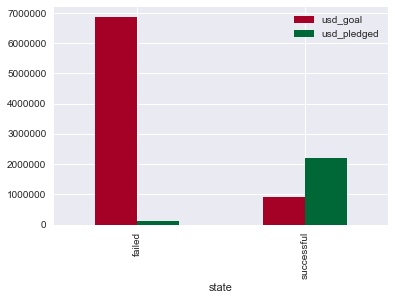

In [26]:
#amount pledged and count
#gdata=final_stat_df[['usd_pledged','state','category']]
#gdata=final_stat_df[['usd_goal','state','category']]
gdata=final_stat_df[['usd_goal','usd_pledged','state']]
#gdata['usd_goal']=gdata['usd_goal']//1000
#gdata['usd_pledged']=gdata['usd_pledged']//1000

# to match the length of your data.

t=(gdata.groupby('state').sum())/1000
#my_colors = list(islice(cycle(['#00ff66', '#FF0000']), None, len(t)))
t.plot(kind='bar',colormap='RdYlGn')
#gdata.head(5)


,pledge_count_ratio,state
state,,
failed,45.716605,failed
successful,92.227620,successful


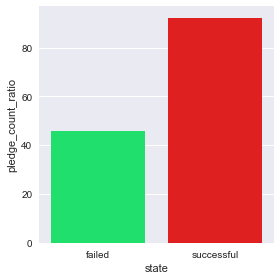

In [27]:
# pledge goal raation pldege & pledge_extra_goal_ratio 
plt.figure(figsize=(10,6))
gdata=final_stat_df[['pledge_count_ratio','state']]
gdata=(gdata.groupby('state').mean())
#gdata.reset_index(level=0, inplace=True)
#type(gdata)
gdata['state']=gdata.index
gdata
#t=final_stat_df.iloc[:][0:1000]
#t
#plt.xticks(0,100)
sb.factorplot(data=gdata,x='state',y='pledge_count_ratio',palette=graph_color_palette,kind='bar')
#sb.boxplot(data=t,x='backers_count',y='state')

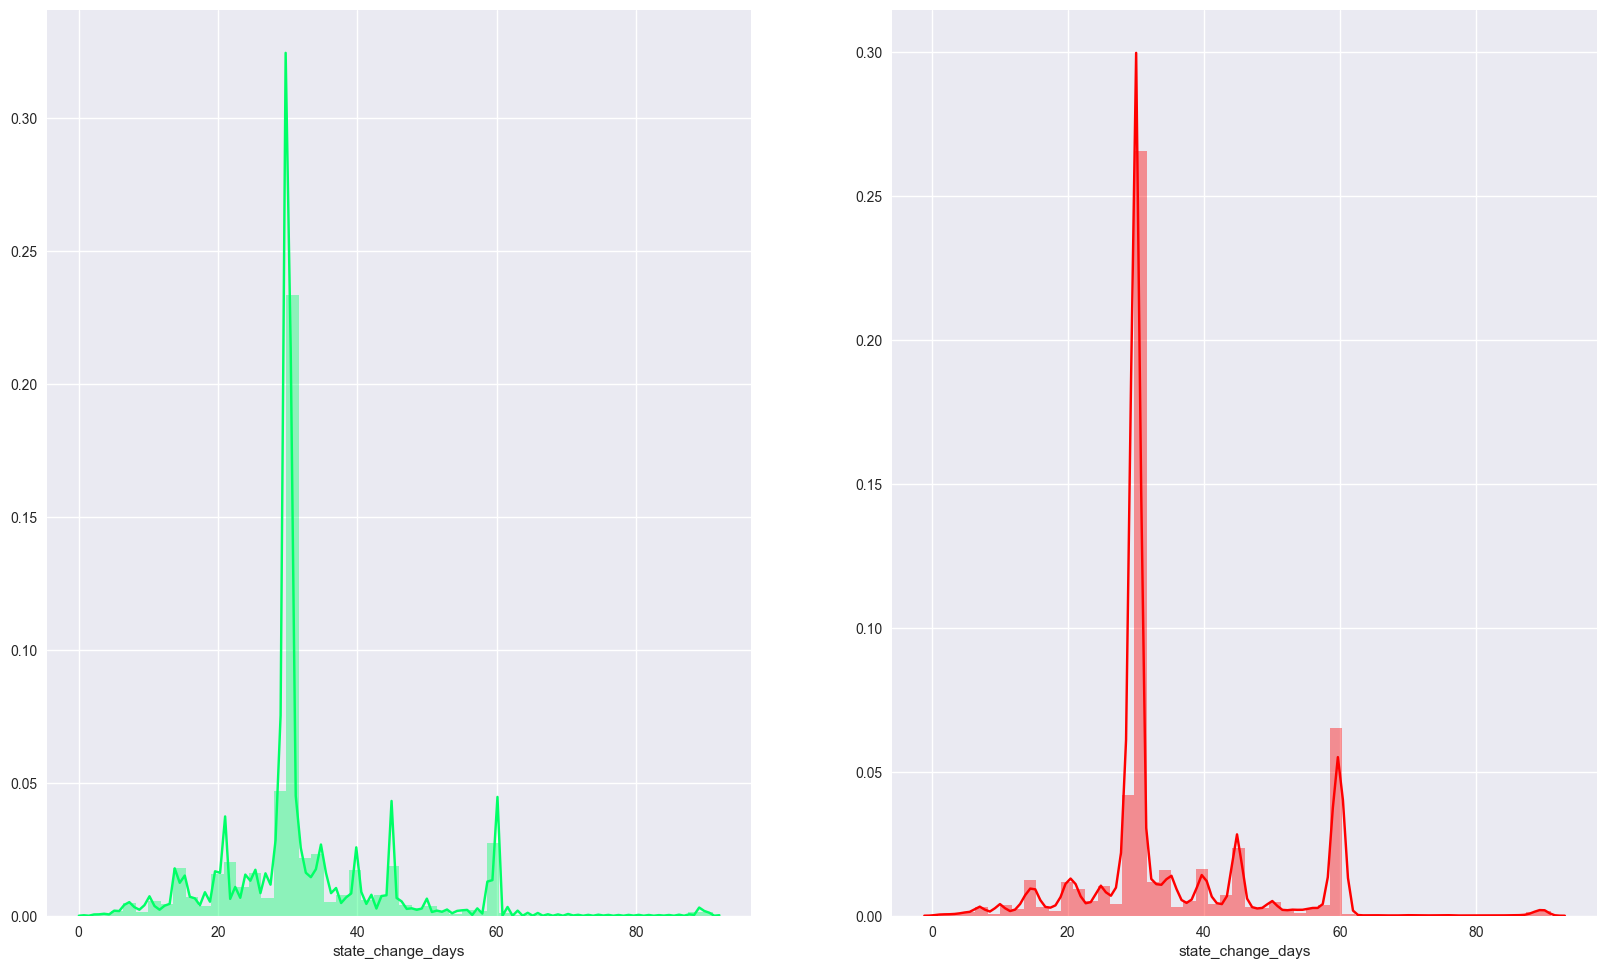

In [28]:
# no of days to get state changed
gdata=final_stat_df[(final_stat_df.state_change_days<100)][['state_change_days','state','category']]#[0:1000]
# data research on the variable
#gdata.state_change_days.describe()
#gdata[(gdata.state_change_days>30)& (gdata.state_change_days<=100)]
#gdata.groupby('state_change_days').count()

#plt.figure(figsize=(20,12))
fig, axes =plt.subplots(figsize=(20,12),dpi=100,nrows=1,ncols=2)

#gdata
ax = sb.distplot(gdata[gdata.state=='successful'].state_change_days,color='#00ff66',ax=axes[0])
ax = sb.distplot(gdata[gdata.state=='failed'].state_change_days,color='#FF0000',ax=axes[1])

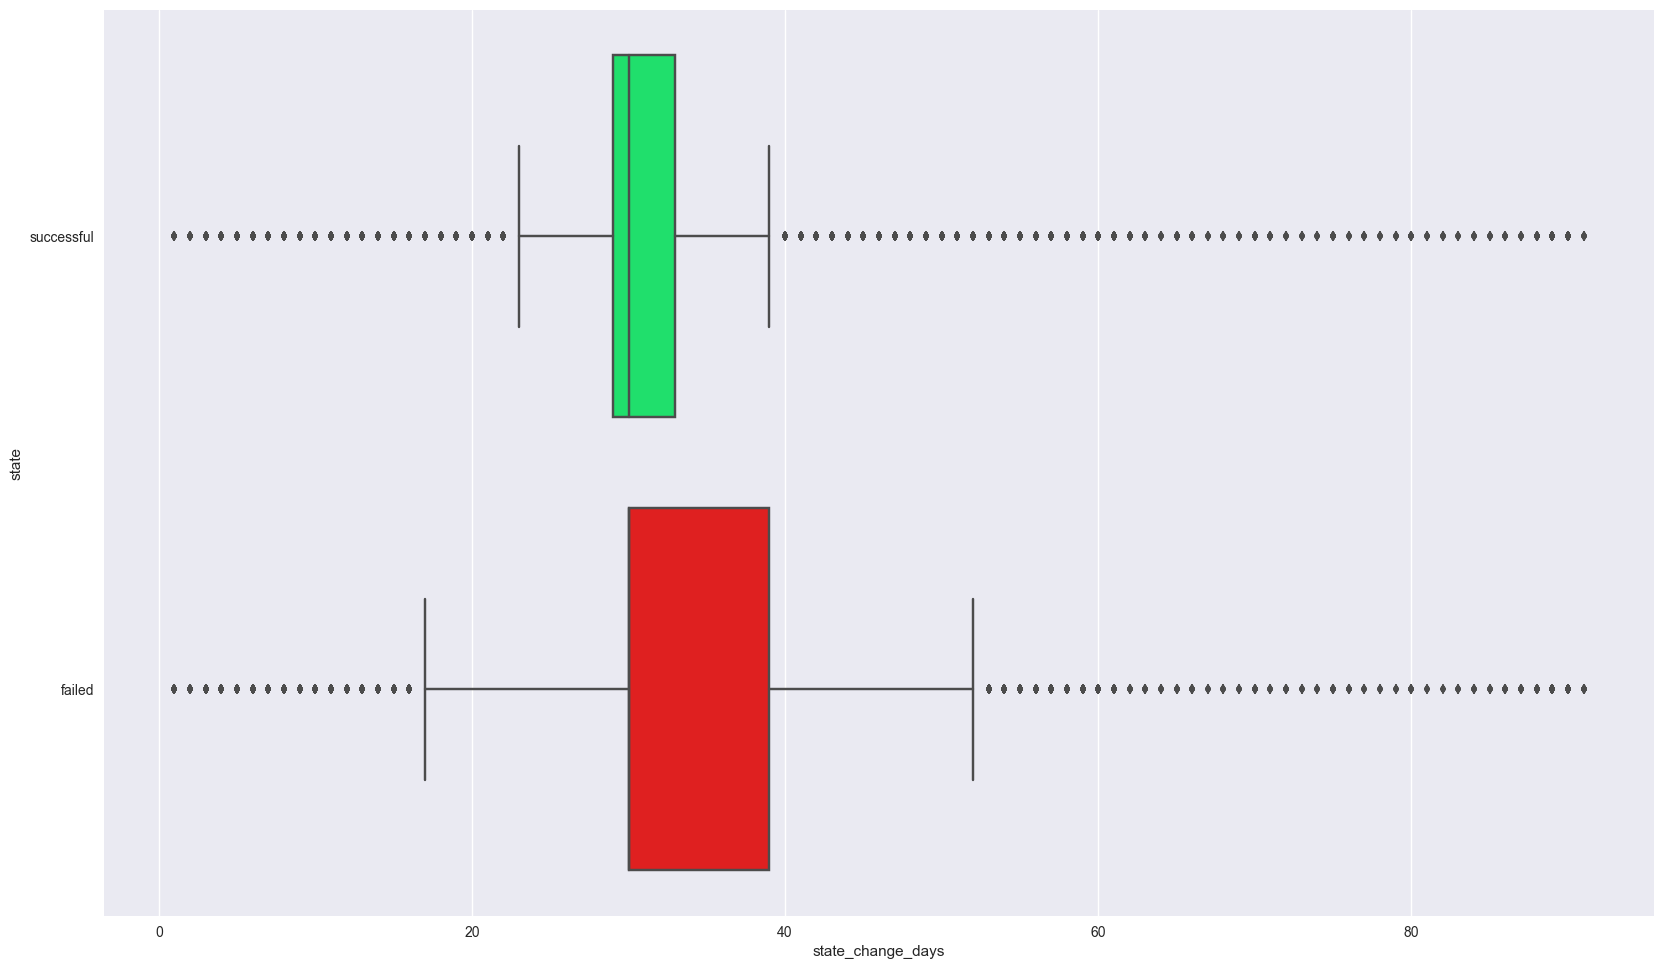

In [29]:
fig, axes =plt.subplots(figsize=(20,12),dpi=100,nrows=1,ncols=1)
plt.figure(figsize=(14,120))
sb.boxplot(data=gdata,x='state_change_days',y='state',palette=graph_color_palette,ax=axes)#,hue='category')

In [30]:
start=0
step=100
stop=10001
#bins_range=[0, 10, 20, 30, 40, 50, 100,110,120,130,140,150,160,170,180,190,200]#range(start, step ,stop)
bins_range=list(range(start ,stop, step))
#bins_range

# Pledge Count Ratio

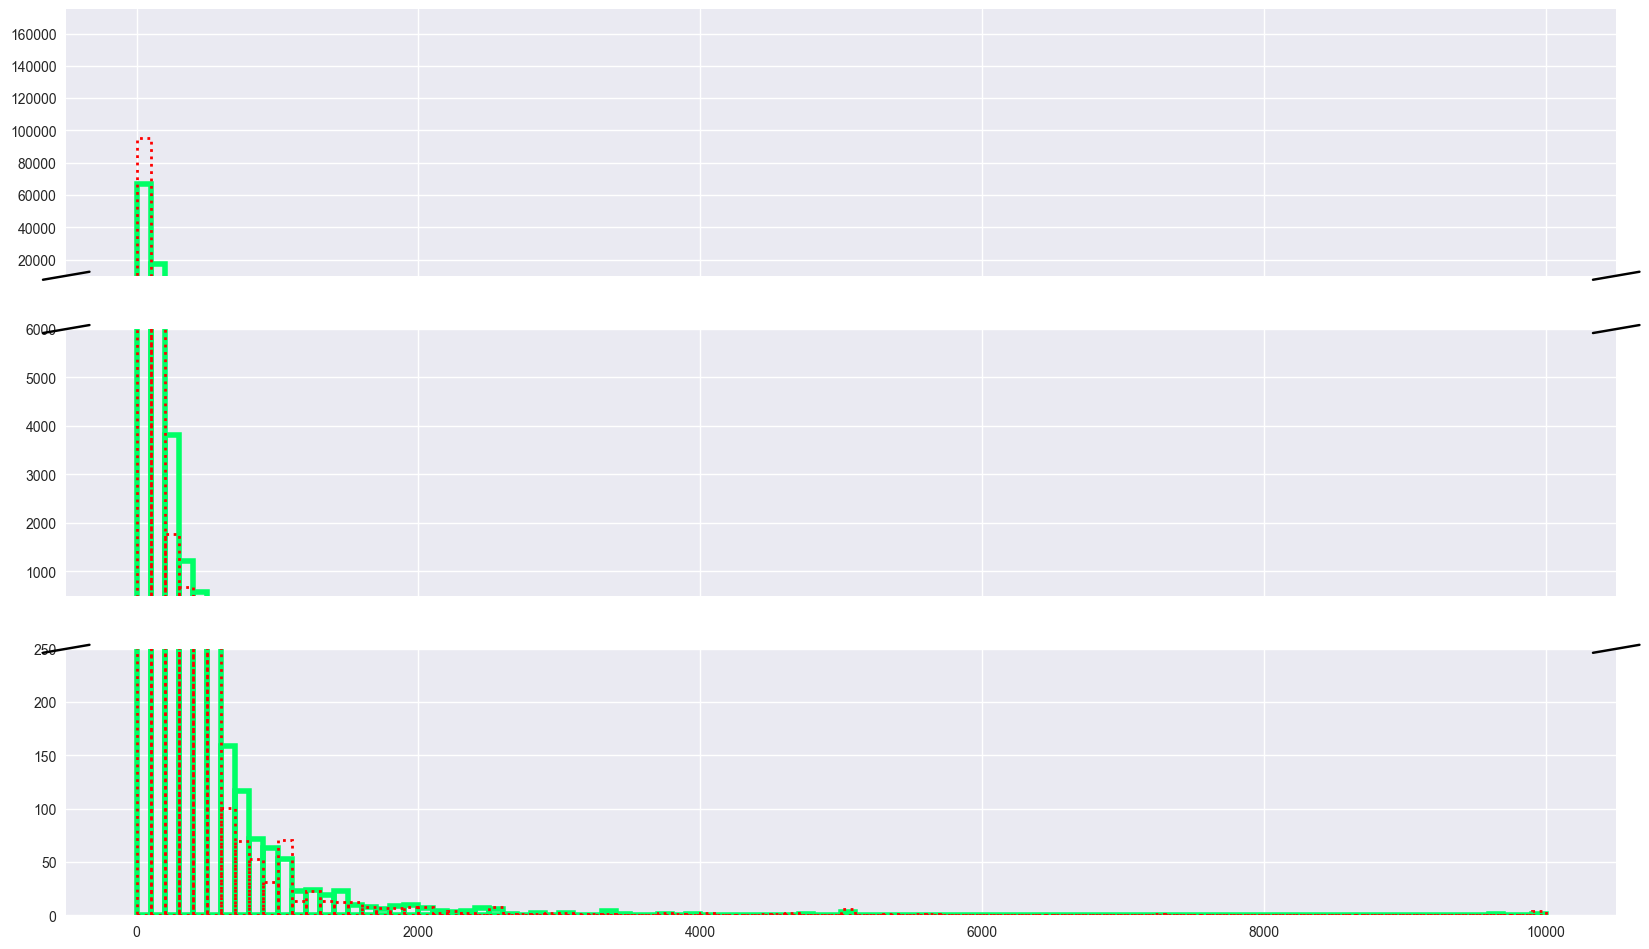

In [31]:
fig, axis = plt.subplots(3,1,figsize=(20,12),dpi=100,sharex=True)
gdata=final_stat_df[['pledge_count_ratio','state','project_id']]#[0:1000
gdata_success=gdata[gdata.state=='successful']
gdata_fail=gdata[gdata.state=='failed']
_=axis[0].set_ylim(10000,175000)
_=axis[1].set_ylim(500,6000)
_=axis[2].set_ylim(0,250)
#axis[1].legend().set_visible(False)

_=axis[0].spines['bottom'].set_visible(False)
_=axis[1].spines['top'].set_visible(False)
_=axis[2].spines['top'].set_visible(False)

_=axis[0].xaxis.tick_top()
_=axis[0].tick_params(labeltop='off')
_=axis[1].xaxis.tick_bottom()
_=axis[2].xaxis.tick_bottom()
d = .015
line_width_fail=2
line_width_success=4
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
_=axis[0].plot((-d,+d),(-d,+d), **kwargs)
_=axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
_=axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
_=axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=axis[2].transAxes)
_=axis[2].plot((-d,+d),(1-d,1+d), **kwargs)
_=axis[2].plot((1-d,1+d),(1-d,1+d), **kwargs)

_=axis[0].hist(gdata_success.pledge_count_ratio,bins=bins_range,edgecolor=color_success, linewidth=line_width_success,color=color_success,fc=(0, 0, 0, 0))
_=axis[0].hist(gdata_fail.pledge_count_ratio,bins=bins_range,edgecolor=color_fail, linewidth=line_width_fail,ls='dotted',color=color_fail,fc=(0, 0, 0, 0))
_=axis[1].hist(gdata_success.pledge_count_ratio,bins=bins_range,edgecolor=color_success, linewidth=line_width_success,color=color_success,fc=(0, 0, 0, 0))
_=axis[1].hist(gdata_fail.pledge_count_ratio,bins=bins_range,edgecolor=color_fail, linewidth=line_width_fail,ls='dotted',facecolor='none',fc=(0, 0, 0, 0))
_=axis[2].hist(gdata_success.pledge_count_ratio,bins=bins_range,edgecolor=color_success, linewidth=line_width_success,color=color_success,fc=(0, 0, 0, 0))
_=axis[2].hist(gdata_fail.pledge_count_ratio,bins=bins_range,edgecolor=color_fail, linewidth=line_width_fail,ls='dotted',color=color_fail,fc=(0, 0, 0, 0))
#plt.show()

In [32]:
# Pledge Goal Ratio

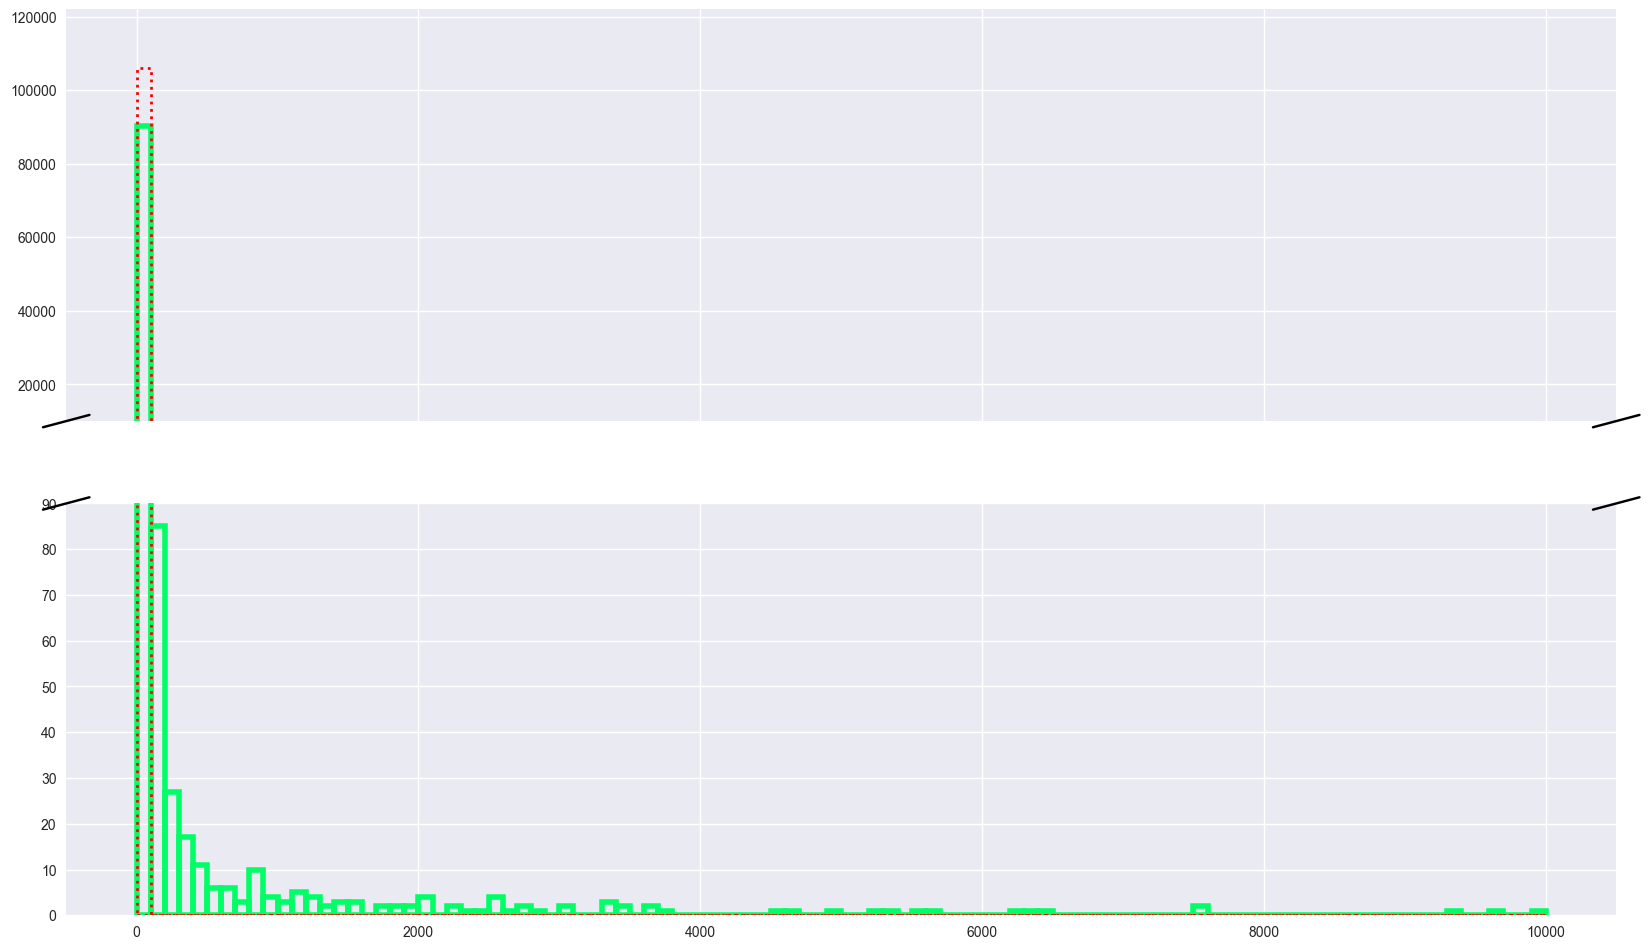

In [33]:
fig, axis = plt.subplots(2,1,figsize=(20,12),dpi=100,sharex=True)
gdata=final_stat_df[['pledge_goal_ratio','state','project_id']]#[0:1000
gdata_success=gdata[gdata.state=='successful']
gdata_fail=gdata[gdata.state=='failed']
_=axis[0].set_ylim(10000,122000)
#_=axis[1].set_ylim(500,6000)
_=axis[1].set_ylim(0,90)
#axis[1].legend().set_visible(False)

_=axis[0].spines['bottom'].set_visible(False)
_=axis[1].spines['top'].set_visible(False)
#_=axis[2].spines['top'].set_visible(False)

_=axis[0].xaxis.tick_top()
_=axis[0].tick_params(labeltop='off')
_=axis[1].xaxis.tick_bottom()
#_=axis[2].xaxis.tick_bottom()
d = .015
line_width_fail=2
line_width_success=4
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
_=axis[0].plot((-d,+d),(-d,+d), **kwargs)
_=axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
_=axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
_=axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)
#kwargs.update(transform=axis[2].transAxes)
#_=axis[2].plot((-d,+d),(1-d,1+d), **kwargs)
#_=axis[2].plot((1-d,1+d),(1-d,1+d), **kwargs)

_=axis[0].hist(gdata_success.pledge_goal_ratio,bins=bins_range,edgecolor=color_success, linewidth=line_width_success,color=color_success,fc=(0, 0, 0, 0))
_=axis[0].hist(gdata_fail.pledge_goal_ratio,bins=bins_range,edgecolor=color_fail, linewidth=line_width_fail,ls='dotted',color=color_fail,fc=(0, 0, 0, 0))
_=axis[1].hist(gdata_success.pledge_goal_ratio,bins=bins_range,edgecolor=color_success, linewidth=line_width_success,color=color_success,fc=(0, 0, 0, 0))
_=axis[1].hist(gdata_fail.pledge_goal_ratio,bins=bins_range,edgecolor=color_fail, linewidth=line_width_fail,ls='dotted',facecolor='none',fc=(0, 0, 0, 0))
#_=axis[2].hist(gdata_success.pledge_goal_ratio,bins=bins_range,edgecolor=color_success, linewidth=line_width_success,color=color_success,fc=(0, 0, 0, 0))
#_=axis[2].hist(gdata_fail.pledge_goal_ratio,bins=bins_range,edgecolor=color_fail, linewidth=line_width_fail,ls='dotted',color=color_fail,fc=(0, 0, 0, 0))
#plt.show()

# pledege amount and count scatter

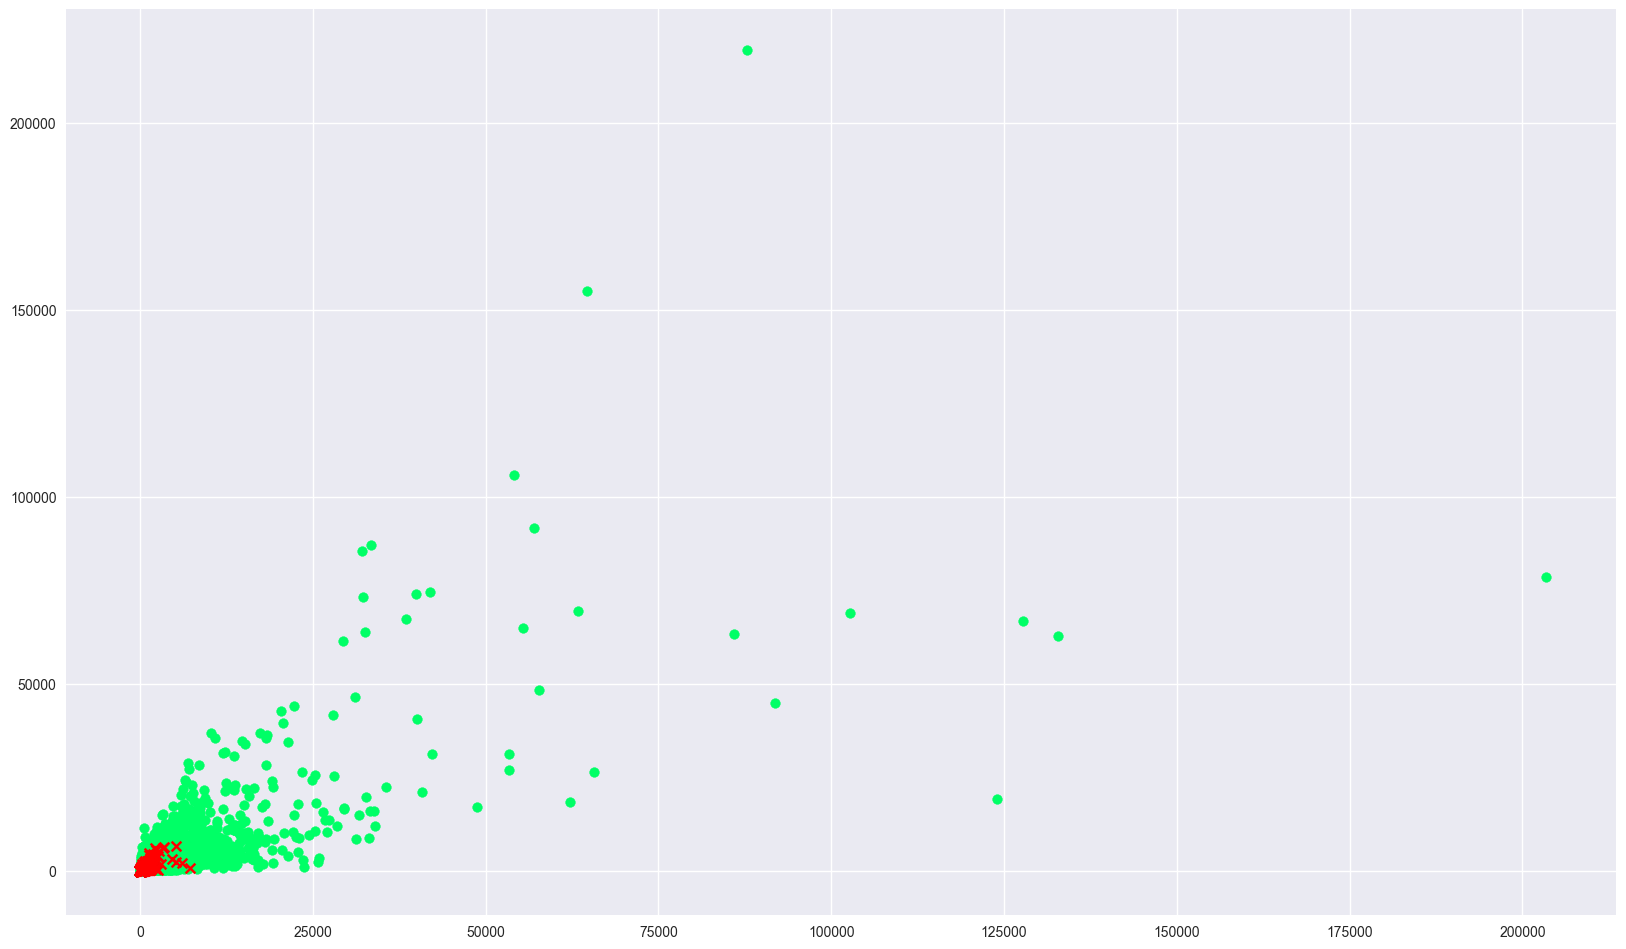

In [34]:
fig, axis = plt.subplots(1,1,figsize=(20,12),dpi=100)
gdata=final_stat_df[['usd_pledged' , 'backers_count','state','project_id']]#[0:1000
gdata_success=gdata[gdata.state=='successful']
gdata_fail=gdata[gdata.state=='failed']
#_=plt.scatter(gdata_success.usd_pledged,gdata_success.backers_count)
#gdata_success.backers_count.max(),gdata_success.backers_count.min()
_=axis.scatter((gdata_success.usd_pledged//100),gdata_success.backers_count,marker='o',color=color_success)
_=axis.scatter((gdata_fail.usd_pledged//100),gdata_fail.backers_count,marker='x',color=color_fail)

# Top 10 category

In [101]:
#fig, axis = plt.subplots(1,1,figsize=(20,12),dpi=100)
gdata=final_stat_df[['category' , 'state','project_id']]#.groupby(['category' , 'state']).count().unstack()#[0:1000
#gdata_success=gdata[gdata.state=='successful']
#gdata_fail=gdata[gdata.state=='failed']
#gdata

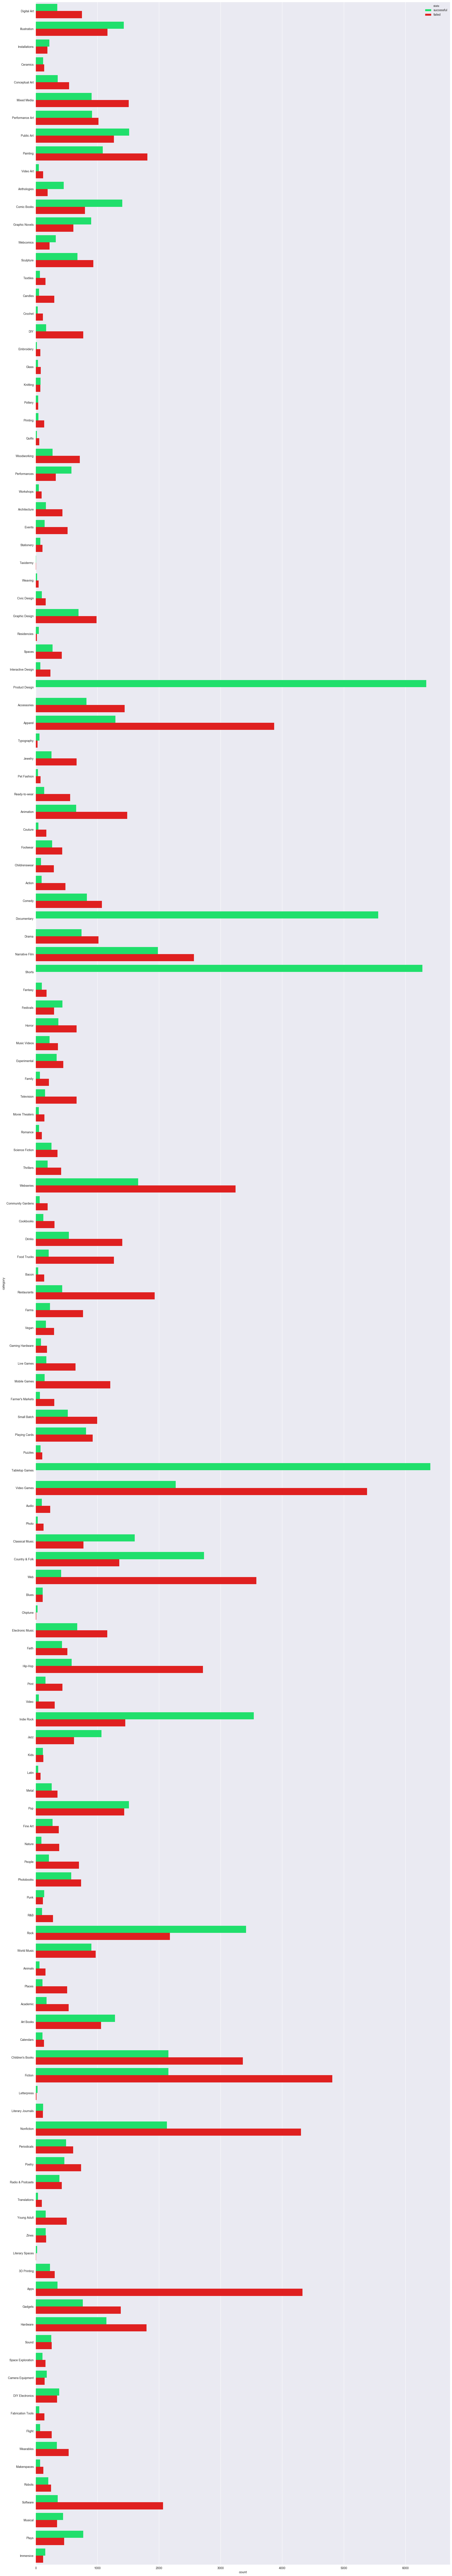

In [36]:
fig, axis = plt.subplots(1,1,figsize=(20,120),dpi=100)
fig.tight_layout()

axis=sb.countplot(data=gdata,y='category',palette=graph_color_palette,hue='state')

In [37]:
#gdata.category.unique()
gdata_success_top=gdata[gdata.state=='successful'].groupby(['category']).count().nlargest(10,'state').reset_index()
gdata_success_bottom=gdata[gdata.state=='successful'].groupby(['category']).count().nsmallest(10,'state').reset_index()

gdata_fail_top=gdata[gdata.state=='failed'].groupby(['category']).count().nlargest(10,'state').reset_index()
gdata_fail_bottom=gdata[gdata.state=='failed'].groupby(['category']).count().nsmallest(10,'state').reset_index()

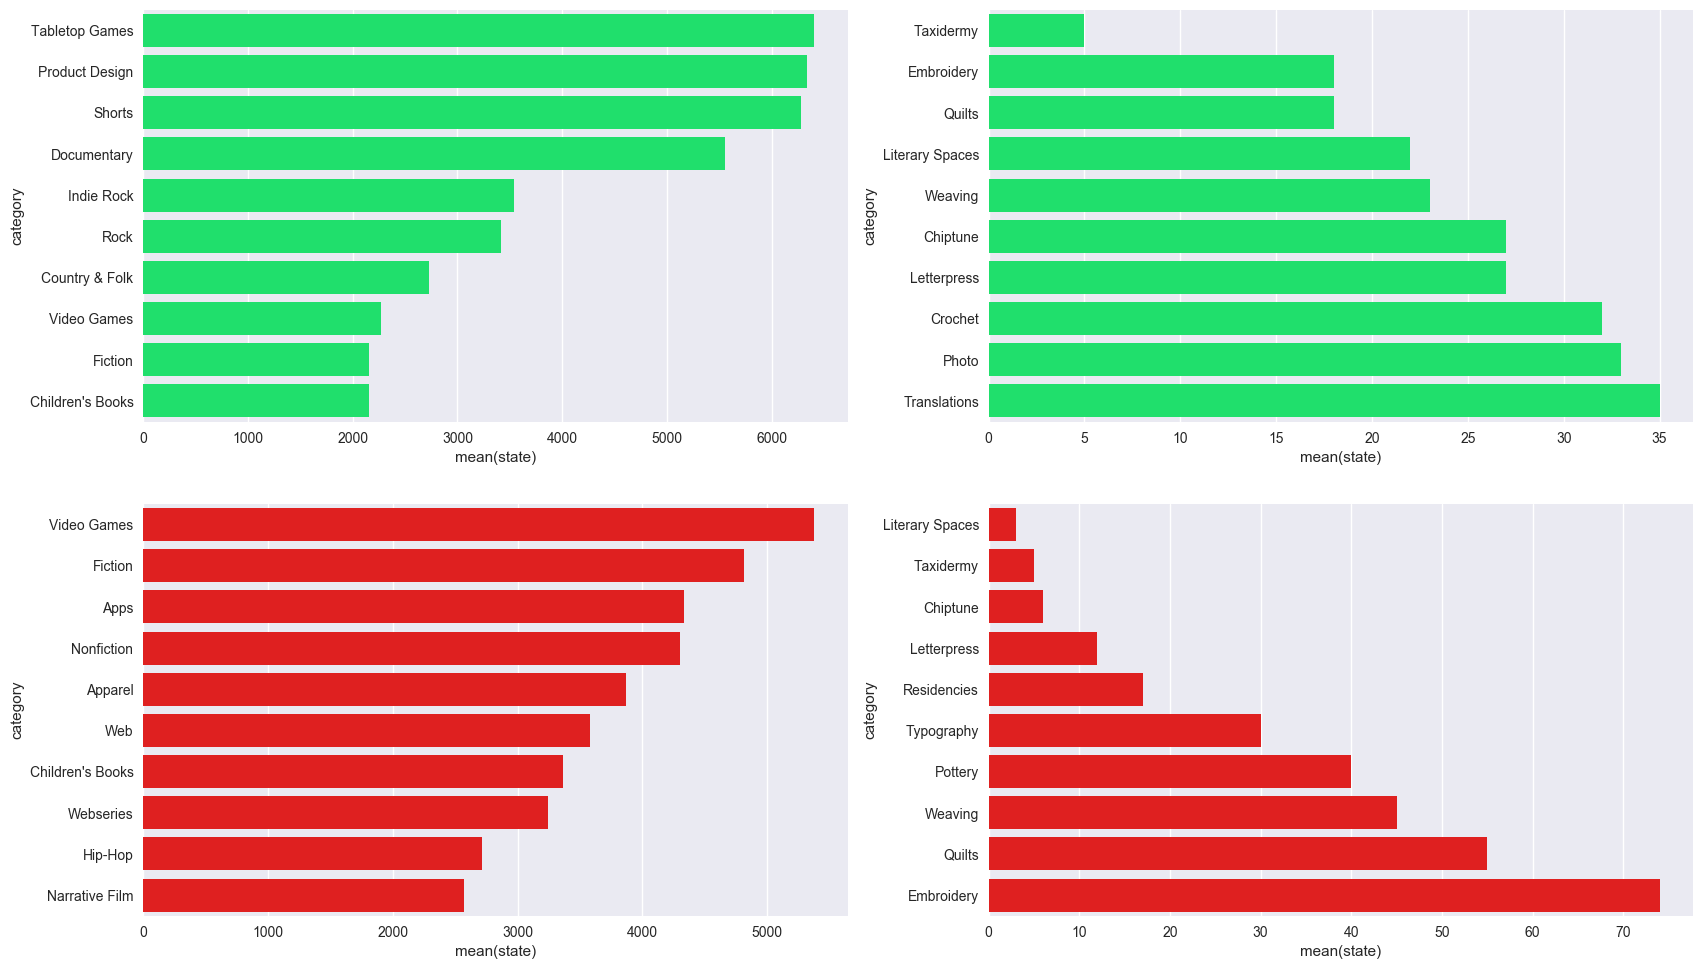

In [38]:
fig, axis = plt.subplots(2,2,figsize=(20,12),dpi=100)
#_=plt.xticks(xlims)
axis[0][0]=sb.barplot(data=gdata_success_top,y='category',x='state',color=color_success,ax=axis[0][0])
#axis[1][1]=sb.boxplot(data=gdata_success_top,x='category',y='state',color=color_success)
axis[0][1]=sb.barplot(data=gdata_success_bottom,y='category',x='state',color=color_success,ax=axis[0][1])

axis[1][0]=sb.barplot(data=gdata_fail_top,y='category',x='state',color=color_fail,ax=axis[1][0])
#axis[1][1]=sb.boxplot(data=gdata_success_top,x='category',y='state',color=color_success)
axis[1][1]=sb.barplot(data=gdata_fail_bottom,y='category',x='state',color=color_fail,ax=axis[1][1])

# staff pick % success & failure

In [39]:
#fig, axis = plt.subplots(1,1,figsize=(20,12),dpi=100)

gdata=final_stat_df[['staff_pick' ,'category' , 'state']]#,'project_id']]
gdata=gdata.groupby(['category' , 'state']).sum()
gdata=gdata.unstack().reset_index()
#gdata['Total_staffPick']

gdata=gdata.assign(
    Total_staffPick=lambda row: calculate_ratio(row.staff_pick.successful,(row.staff_pick.successful+row.staff_pick.failed))
)
_=gdata.Total_staffPick.fillna('0')

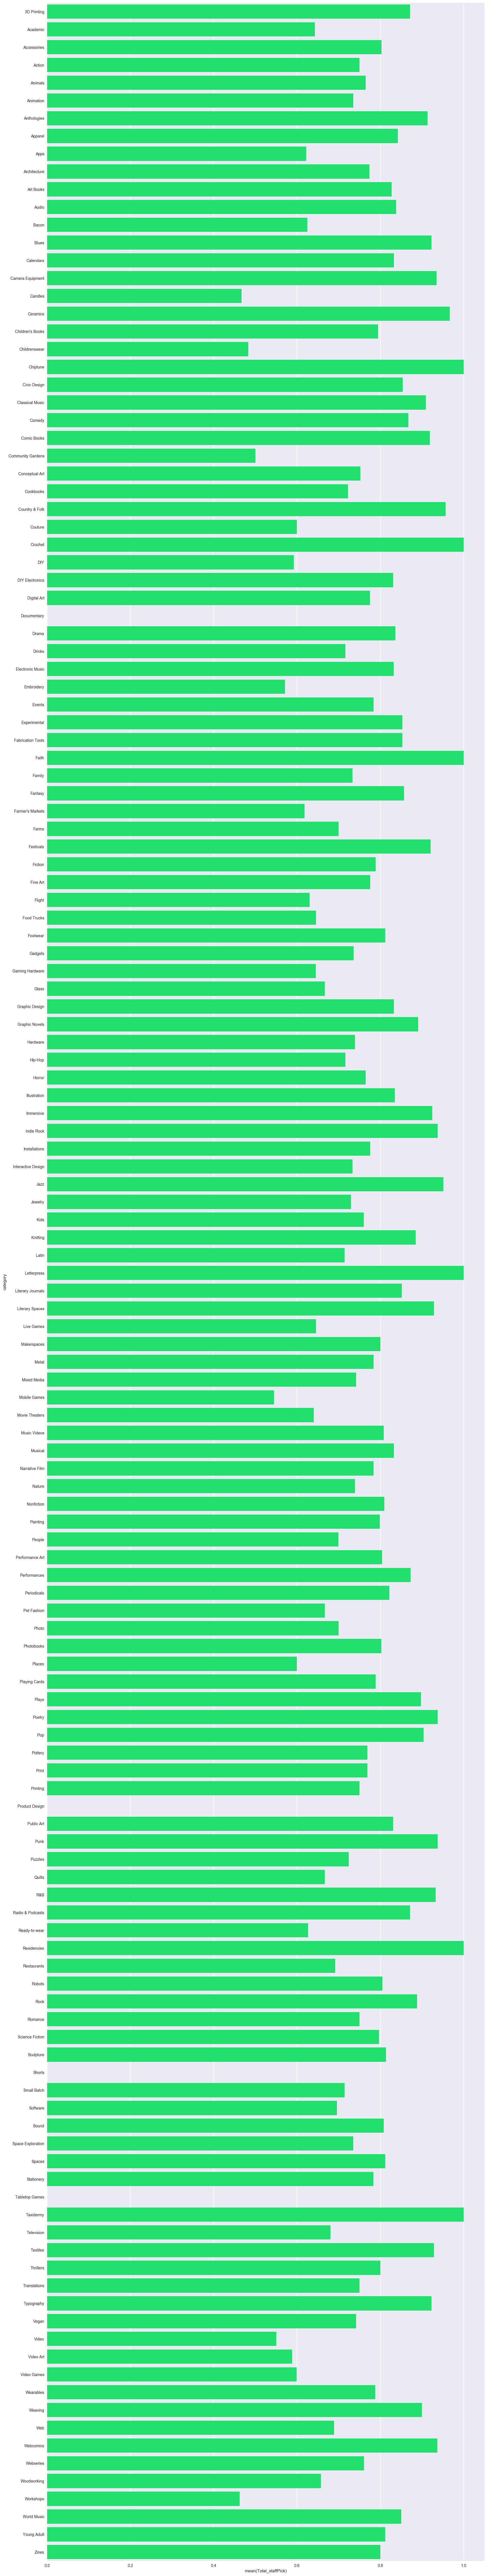

In [40]:
fig, axis = plt.subplots(1,1,figsize=(20,120),dpi=100)
#_=plt.xticks(xlims)
axis=sb.barplot(data=gdata,y='category',x='Total_staffPick',color=color_success,ax=axis)

In [41]:
#gdata[gdata.Total_staffPick>0.8]
#t=final_stat_df[['staff_pick' ,'category' , 'state']]
#t[(t.category=='3D Printing') & (t.state=='successful')& (t.staff_pick==False)]# total 537, success=230, staff pick =88(true),142(false) 
#t[(t.category=='3D Printing') & (t.state=='failed')& (t.staff_pick)]# total 537, success=230, staff pick =88(true),142(false) 

# Time wise projects

In [79]:
def getMonth(row):
    date_format = '%Y-%m-%d %H:%M:%S'
    return datetime.strptime(row.created_at,date_format).month
    #print (type(row.created_at))
def getYear(row):
    date_format = '%Y-%m-%d %H:%M:%S'
    return datetime.strptime(row.created_at,date_format).year

In [96]:
gdata=final_stat_df[['created_at' ,'category' , 'state']]#[0:10]

gdata['create_month']=gdata.apply(getMonth,axis=1)
gdata['create_year']=gdata.apply(getYear,axis=1)
gdata=gdata.groupby(['create_year','create_month']).count()
gdata=gdata.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [98]:
t = gdata.pivot("create_month", "create_year", "state")
#gdata#.info()

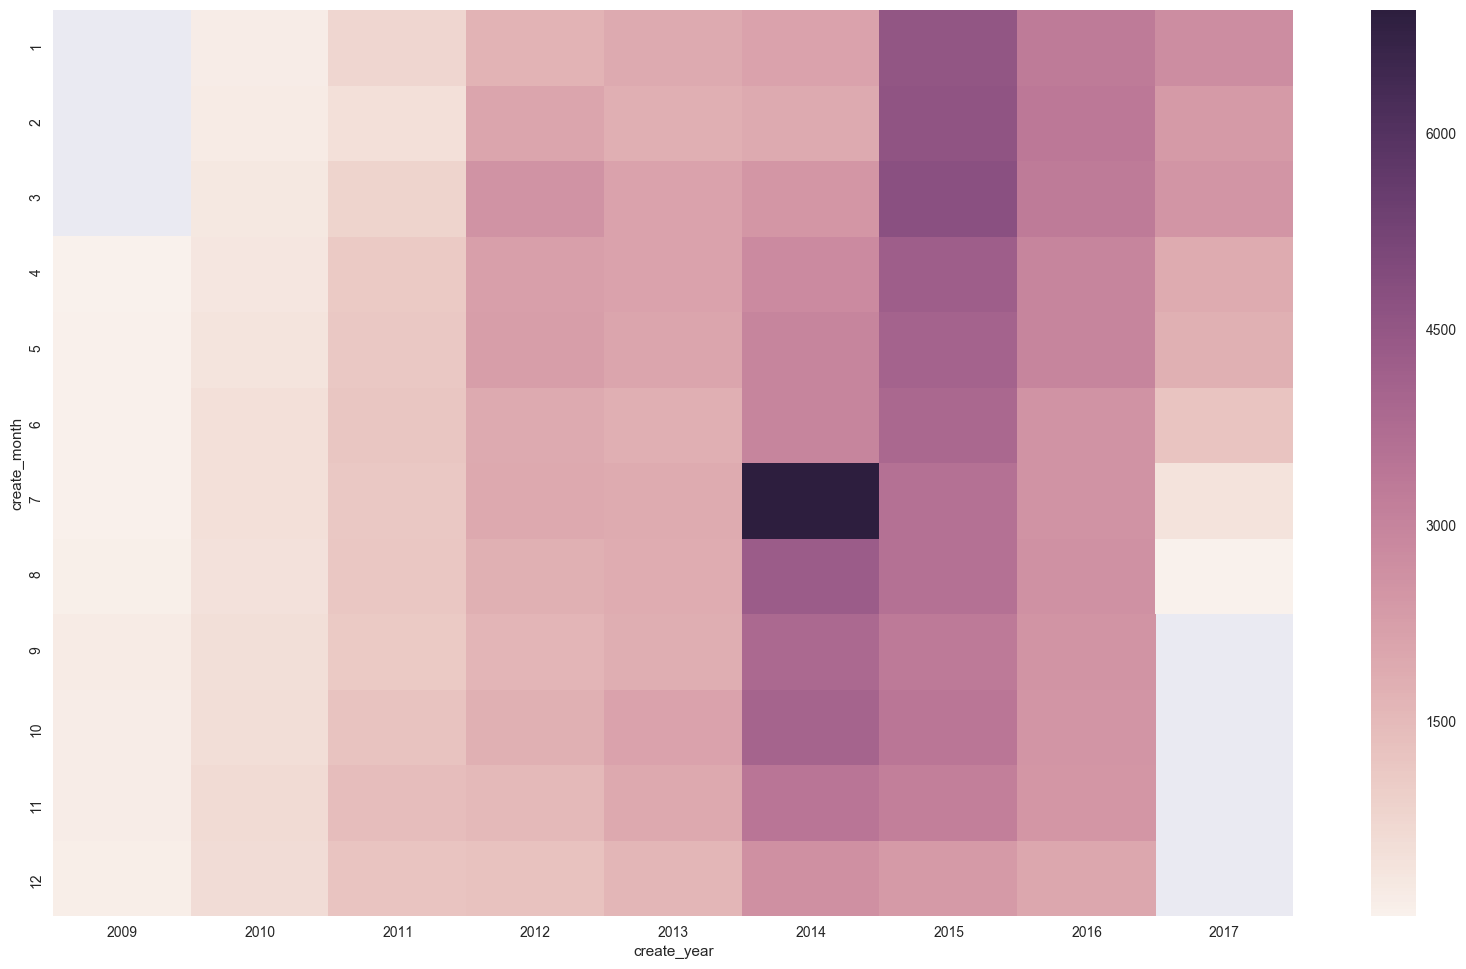

In [100]:
fig, axis = plt.subplots(1,1,figsize=(20,12),dpi=100)
axis = sb.heatmap(t)

In [46]:
#location-country , success failure and amount , bubble

In [47]:
final_stat_df.country.unique()

array(['US', 'GB', 'SE', 'HK', 'ES', 'FR', 'CA', 'DE', 'AU', 'CH', 'BE',
       'NL', 'MX', 'SG', 'NO', 'AT', 'IE', 'IT', 'NZ', 'LU', 'DK'], dtype=object)

str

In [51]:
# time 